In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
tqdm.pandas()
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
#Importing and analyzing the datasets
goodreads_train = pd.read_csv(r"C:\Users\Dell\Desktop\caryon\goodreads_train.csv") 
goodreads_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
goodreads_train.shape

(900000, 11)

In [4]:
goodreads_train.dtypes

user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [5]:
goodreads_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


In [6]:
goodread_train, goodread_test = train_test_split(goodreads_train, test_size=0.10)
print(goodread_train.shape, goodread_test.shape)

(810000, 11) (90000, 11)


In [7]:
goodread_train.isnull().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          82589
started_at      246931
n_votes              0
n_comments           0
dtype: int64

In [8]:
goodread_train.dtypes

user_id         object
book_id          int64
review_id       object
rating           int64
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
dtype: object

In [9]:
goodread_train.set_index("review_id", inplace=True)
goodread_test.set_index("review_id", inplace=True)

In [10]:
books = goodread_train.drop('rating', axis=1)
books_rates = goodread_train['rating']

books.shape,books_rates.shape

((810000, 9), (810000,))

In [11]:
# Droping some non-essential columns
books.drop(columns=['date_updated', 'read_at', 'started_at'], axis=1, inplace=True)
books.shape

(810000, 6)

In [12]:
# Removing rows with negative n_votes or negative n_comments 
books = books[(books['n_votes'] >= 0) & (books['n_comments'] >= 0)]
books.shape

(809955, 6)

In [13]:
# Checking duplications
books.duplicated().sum()

0

In [14]:
sum(books.duplicated(subset=['review_text']))

8568

In [15]:
books.drop_duplicates(subset=['review_text'], inplace=True)

In [16]:
books.shape

(801387, 6)

In [17]:
# Finding unappropriate texts
unapp_text=np.where(books['review_text'].apply(lambda txt: np.mean(list(map(len, txt.split())))) > 25)

In [18]:
book=books.iloc[unapp_text]
book.shape

(16, 6)

In [19]:
books.drop(book.index, axis=0, inplace=True)

In [20]:
books.shape

(801371, 6)

In [21]:
spoil_statement = 'spoiler alert'
books['spoil']=[True if spoil_statement in txt else False for txt in books['review_text'] ]

In [22]:
books[books['spoil'] == True]

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil
review_id,,,,,,,
edaeec606a0a807a4870baf048bf1f80,b56661124d31552f8ea317746b99c3b2,27263454,** spoiler alert ** \n This review contains so...,Sun Mar 13 07:23:25 -0700 2016,26,22,True
828d16efcbe76d387393cbbd7c57b81c,016e4d567d080cb669998f32b4f42820,237209,** spoiler alert ** \n This would have been a ...,Mon May 25 16:36:33 -0700 2015,1,1,True
2d9a34b445a1572d7d0990be57ef8488,d1fadd1a3dd49adb282cacc65da78eac,13552306,** spoiler alert ** \n CAUTION: By reading the...,Fri Nov 25 09:55:05 -0800 2016,2,0,True
a62684d5eb4003bec4fa50ea6fa48db4,fe02db082db48d326e32d1626b2eb0a6,11861062,** spoiler alert ** \n corrected for spelling ...,Sat Jan 14 10:09:06 -0800 2012,68,59,True
8edbb05092e845187d0ce5ff4fd796b8,8e4573b94871e75398528196a9f39dff,10818853,** spoiler alert ** \n I have read some awful ...,Thu Aug 16 21:32:21 -0700 2012,1,14,True
...,...,...,...,...,...,...,...
7964c18d3e39493a0c2a8e47a661ca0e,9ab4f527092424a77be21e1a139b9a09,8663600,** spoiler alert ** \n Originally posted at On...,Mon May 16 21:20:14 -0700 2011,0,0,True
f3c7592d0218eb775cb390144fd37ccb,fa9b29a7a0b7219aa5050b5f0446d840,28187,** spoiler alert ** \n Primarily this just... ...,Fri Sep 13 00:04:07 -0700 2013,0,0,True
187fde26ee5ba34294f4c6ac548b09f8,42f0a7cb849df52c7b4950ce0a5bf876,121749,** spoiler alert ** \n This was originally my ...,Tue Jul 08 15:00:20 -0700 2008,0,0,True


## Preprocessing the review texts

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [24]:
import string
exclist = string.punctuation + string.digits
lamitizer = WordNetLemmatizer()
stopwords_list = stopwords.words('english')

def preprocessing_text(txt):
    words = txt.translate(str.maketrans(exclist, ' '*len(exclist))).lower().split()
    return (' '.join([lamitizer.lemmatize(word) for word in words if word not in stopwords_list])).strip()


books['review_text_tokens'] = books['review_text'].progress_apply(preprocessing_text)

books['review_text_tokens'].sample(5)

100%|█████████████████████████████████| 801371/801371 [29:31<00:00, 452.38it/s]


review_id
5e9173ca231c19f14fd16e1ec83ddf87    book agree reviewer said book bit pacing probl...
31a129a5fcf87a128954176b5d6b0d14    actual rating fractured ok novel much guessing...
591a91c198fe3c0584fb4a8634f8fb6d    review natasha gentile book scratching head on...
1a781a58834f5ec17450b0e7bb1907ef    ahhh book book blow mind waiting read book lik...
cab14d968eef209009cb92f596af077d    reminded reading sunshine away placid girl rea...
Name: review_text_tokens, dtype: object

## Exploratory Data Analysis

In [25]:
datetime_format = '%a %b %d %H:%M:%S %z %Y'
books['date_added'] = pd.to_datetime(books['date_added'], infer_datetime_format=True, utc=True)

books.sample(5)

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil,review_text_tokens
review_id,,,,,,,,
e6b426ac93fcdd245ef9886bd8086d0a,2665c8f0bbd66b70caf2c3fc78ee96cf,11607446,Chris is a genius. Such talent in someone so y...,2016-05-27 02:18:32+00:00,1,0,False,chris genius talent someone young constantly a...
6d18e4e776c8aeab79eb5dc78d3f6b6e,d7c83751bd3f82b0a168935f60d631e6,23677316,Full Rating: 3.5/5 \n This book was decent eno...,2017-03-19 19:27:06+00:00,0,0,False,full rating book decent enough pretty interest...
ea9e01fd92588a7a21f5b02604ae0116,a8dfd58592b83152db2e7771eb735fcb,29483403,I'm at a loss of words. I don't even know wher...,2017-07-28 22:52:21+00:00,3,0,False,loss word even know begin book destroyed heart...
e8dac67bd89a84c71037714da1988ae8,5d62c43db99989f793832a8b3c4beae8,18004320,So sad this series is over! These books really...,2014-03-23 17:41:46+00:00,0,0,False,sad series book really unique story really ori...
b11071d61b9ecf4fe7a0aec0aba116b8,cfaa2a1f39e15728a417089640673689,5287473,If I was a 13 year old girl I think I would ha...,2013-11-30 14:34:35+00:00,0,0,False,year old girl think would enjoyed book little ...


In [29]:
books_dates_added = books['date_added'].dt.date


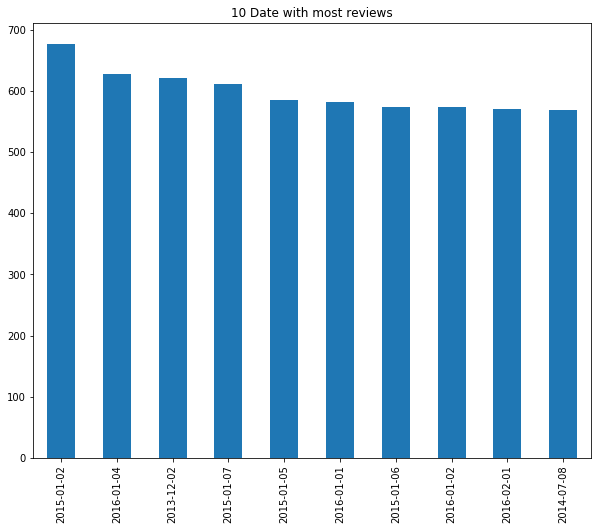

In [30]:
books_dates_added.value_counts()[:10].plot(kind='bar', 
                                            figsize=(10, 8),
                                            title='10 Date with most reviews')

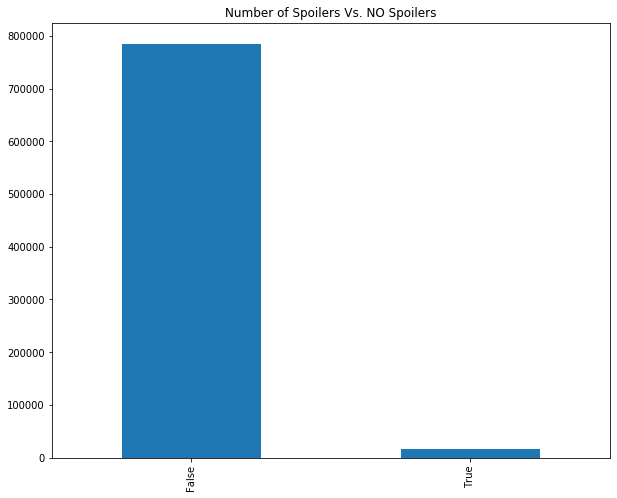

In [31]:
books['spoil'].value_counts().plot(kind='bar', 
                                   figsize=(10, 8),
                                   title='Number of Spoilers Vs. NO Spoilers')                         

In [32]:
books_rates.sample(5)

review_id
0494f6c13ba40a02ebd53e4863dd6b5b    3
106405198ae8c94499f3fb72bc24dbd9    5
5698c4b872a7818c7489f9fa858df6c9    4
f6b090ade03b02ea131bbb8357bb84da    4
cba6c3d67c25ebeee3bcad8cbe98e127    4
Name: rating, dtype: int64

In [25]:
clean_books_rate = books.merge(books_rates, how='inner', on='review_id')
clean_books_rate.sample(3)

,user_id,book_id,review_text,date_added,n_votes,n_comments,spoil,review_text_tokens,rating
review_id,,,,,,,,,
5d46eca88f0c02a9de132454973f0d6c,e940711ae93c1902afa25745739139e0,22756190,I liked it but it was nothing really special. ...,Mon Oct 26 11:15:53 -0700 2015,1,0,False,liked nothing really special character okay ev...,3
822d4db4059e05b702db09e88963f367,0d81d76c4b6a2c7884d2392bc50c2b4f,17373178,I loved it! Angels or butterflies? Sometimes y...,Wed Feb 20 19:41:39 -0800 2013,1,1,False,loved angel butterfly sometimes want started r...,5
4db585780c89f88037dcb832925e3336,ff81e53e2e7287f05f19e1efbfcec0bf,764347,I started out this book with low expectations ...,Sat Apr 07 19:33:55 -0700 2012,0,0,False,started book low expectation high standard rea...,5


In [26]:
clean_books_rate.drop(['review_text'], axis=1,inplace=True)

In [27]:
clean_books_rate.to_csv(r'C:\Users\Dell\Desktop\caryon\final_eda_data.csv')

In [28]:
#clean_books_rate=pd.read_csv(r'C:\Users\Dell\Desktop\caryon\final_eda_data.csv')

In [29]:
clean_books_rate.head()

,user_id,book_id,date_added,n_votes,n_comments,spoil,review_text_tokens,rating
review_id,,,,,,,,
2c30cadfee9ebc276999f0cdda3de32e,aca760854b57ce2ec981df32e46dc96c,13526165,Mon Jul 03 19:37:38 -0700 2017,7,0,False,quirky pretty good confused first thought funn...,3
cbc0495e331e5e769c3af501865463ad,1a18545e0bf07492a69ddfb430e090bb,17465574,Sun Mar 15 12:02:41 -0700 2015,0,0,False,love love love loved book every scene resonate...,5
6f723a926f38a4466e7bf0ba2f302123,efcdfdafdb3210d09834c44b78b7973b,26101055,Mon Oct 05 05:30:37 -0700 2015,9,0,False,copy book provided netgalley via publisher exc...,4
92d22c3beccee5f9a1372e58cdff86eb,2c416ed526b5c03c4acb81116f013576,13107655,Fri Jan 20 18:56:40 -0800 2012,2,3,False,even though series much like lora leigh breed ...,2
0ac0a1c95afc3c58e79a9bd0ce3509bb,60b7212f3b01121b9ea5bddc0262bb41,18076439,Wed Nov 13 15:13:08 -0800 2013,0,0,False,always loved long voice light witty romance st...,4


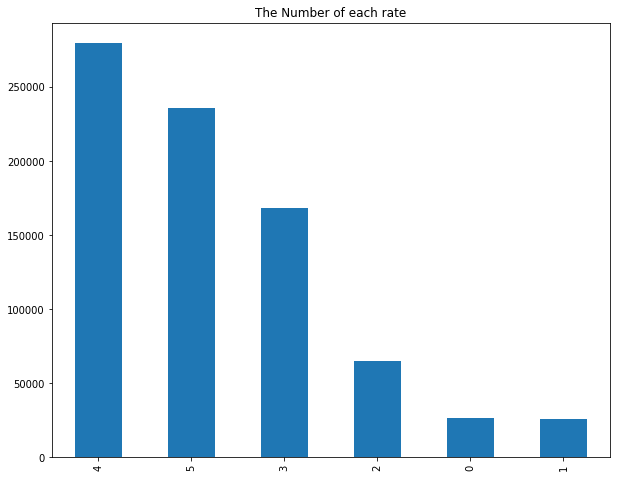

In [18]:
clean_books_rate['rating'].value_counts().plot(kind='bar', 
                                                figsize=(10, 8),
                                                title='The Number of each rate')

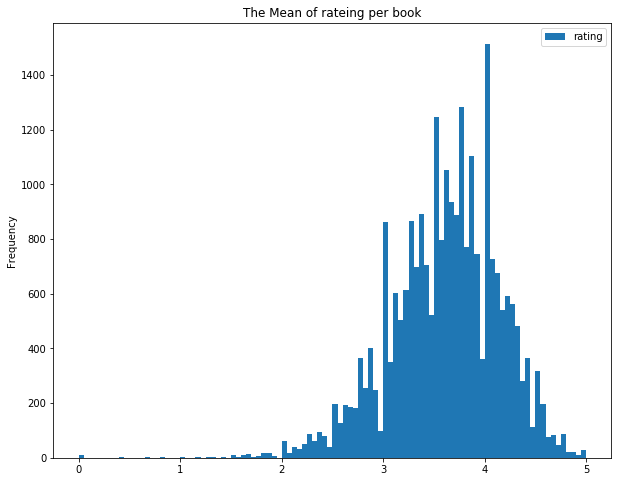

In [19]:
clean_books_rate.groupby(by='book_id').mean()['rating'] \
                    .plot(kind='hist', 
                            figsize=(10, 8),
                            title='The Mean of rateing per book',
                            bins=100, 
                            legend=True)

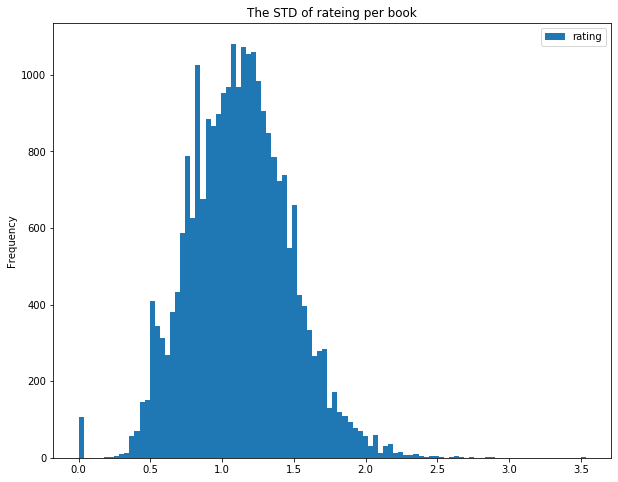

In [20]:
clean_books_rate.groupby(by='book_id').std()['rating'] \
                    .plot(kind='hist', 
                            figsize=(10, 8),
                            title='The STD of rateing per book',
                            bins=100, 
                            legend=True)

## Popularity Based Recommendation

In [30]:
#Getting the new dataframe which contains users who has given 50 or more ratings
new_df=clean_books_rate.groupby("book_id").filter(lambda x:x['rating'].count() >=50)
new_df.shape

(449616, 8)

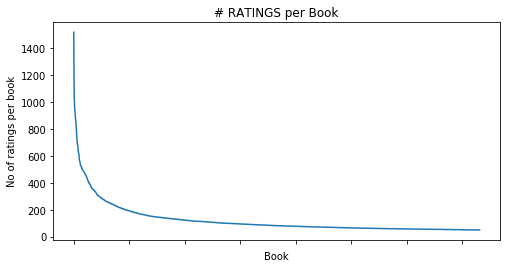

In [31]:
no_of_ratings_per_book = new_df.groupby(by="book_id")['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_book.values)
plt.title('# RATINGS per Book')
plt.xlabel('Book')
plt.ylabel('No of ratings per book')
ax.set_xticklabels([])

plt.show()

In [32]:
#Average rating of the product 
new_df.groupby('book_id')['rating'].mean().head()

book_id
1    4.588235
2    4.453521
3    4.531401
5    4.700472
6    4.587013
Name: rating, dtype: float64

In [33]:
new_df.groupby('book_id')['rating'].mean().sort_values(ascending=False).head()

book_id
22024907    4.821429
464164      4.785714
24548235    4.771930
27422533    4.723077
18628601    4.705882
Name: rating, dtype: float64

In [34]:
#Total no of rating for product
new_df.groupby('book_id')['rating'].count().sort_values(ascending=False).head()

book_id
11870085    1517
11235712    1334
2767052     1220
7260188     1136
29056083    1038
Name: rating, dtype: int64

In [35]:
ratings_mean_count = pd.DataFrame(new_df.groupby('book_id')['rating'].mean())
ratings_mean_count 

,rating
book_id,
1,4.588235
2,4.453521
3,4.531401
5,4.700472
6,4.587013
...,...
34346381,4.250000
34454739,4.250000
35247769,3.651282


In [36]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('book_id')['rating'].count())
ratings_mean_count 

,rating,rating_counts
book_id,,
1,4.588235,340
2,4.453521,355
3,4.531401,621
5,4.700472,424
6,4.587013,385
...,...,...
34346381,4.250000,56
34454739,4.250000,64
35247769,3.651282,195


In [37]:
ratings_mean_count.head()

,rating,rating_counts
book_id,,
1,4.588235,340
2,4.453521,355
3,4.531401,621
5,4.700472,424
6,4.587013,385


In [38]:
ratings_mean_count['rating_counts'].max()

1517

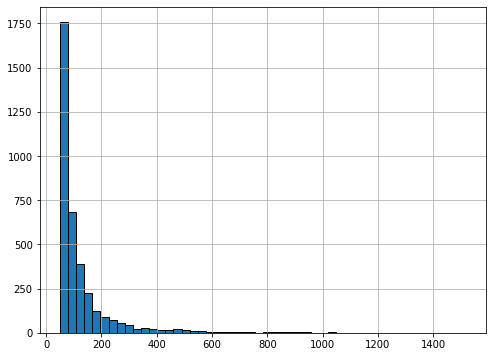

In [39]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

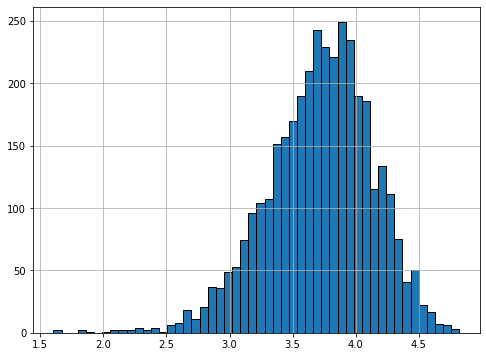

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

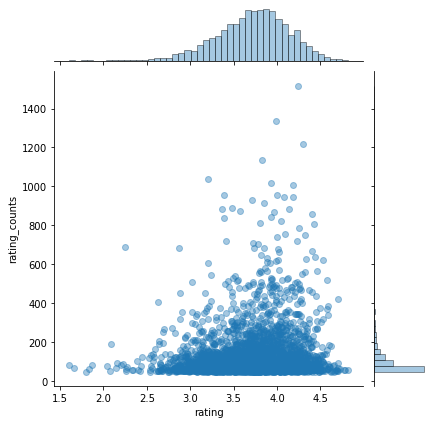

In [41]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

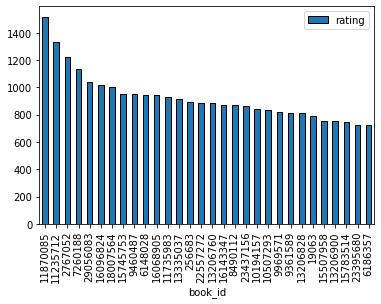

In [42]:
popular_books = pd.DataFrame(new_df.groupby('book_id')['rating'].count())
most_popular = popular_books.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

## Model-based collaborative filtering system

In [64]:
new_df1=new_df.copy()
new_df1.head()

,user_id,book_id,date_added,n_votes,n_comments,spoil,review_text_tokens,rating
review_id,,,,,,,,
2c30cadfee9ebc276999f0cdda3de32e,aca760854b57ce2ec981df32e46dc96c,13526165,Mon Jul 03 19:37:38 -0700 2017,7,0,False,quirky pretty good confused first thought funn...,3
cbc0495e331e5e769c3af501865463ad,1a18545e0bf07492a69ddfb430e090bb,17465574,Sun Mar 15 12:02:41 -0700 2015,0,0,False,love love love loved book every scene resonate...,5
29215e4d1e14c2b298fa7ef073bca30b,a9750d56107b6757cd89cbe959f33d9f,31451174,Thu Jun 15 12:59:05 -0700 2017,6,0,False,rating minor spoiler spoiler book event previo...,5
8bdc6f517acf253668be798890cf5ff6,7098fa964f826d4674736b8caa8a41f6,16101128,Wed Sep 24 20:45:02 -0700 2014,0,0,False,rid earth human rid human humanity like book l...,4
1f9de42e11849dc8e90fe32ddcda15a3,babc631ce1f8d2deab56f65cee762062,15702268,Thu Nov 01 21:23:56 -0700 2012,4,0,False,sarah despises lord hugh altercation family ul...,5


In [65]:
df1=new_df1.reset_index()
df1.head()

,review_id,user_id,book_id,date_added,n_votes,n_comments,spoil,review_text_tokens,rating
0,2c30cadfee9ebc276999f0cdda3de32e,aca760854b57ce2ec981df32e46dc96c,13526165,Mon Jul 03 19:37:38 -0700 2017,7,0,False,quirky pretty good confused first thought funn...,3
1,cbc0495e331e5e769c3af501865463ad,1a18545e0bf07492a69ddfb430e090bb,17465574,Sun Mar 15 12:02:41 -0700 2015,0,0,False,love love love loved book every scene resonate...,5
2,29215e4d1e14c2b298fa7ef073bca30b,a9750d56107b6757cd89cbe959f33d9f,31451174,Thu Jun 15 12:59:05 -0700 2017,6,0,False,rating minor spoiler spoiler book event previo...,5
3,8bdc6f517acf253668be798890cf5ff6,7098fa964f826d4674736b8caa8a41f6,16101128,Wed Sep 24 20:45:02 -0700 2014,0,0,False,rid earth human rid human humanity like book l...,4
4,1f9de42e11849dc8e90fe32ddcda15a3,babc631ce1f8d2deab56f65cee762062,15702268,Thu Nov 01 21:23:56 -0700 2012,4,0,False,sarah despises lord hugh altercation family ul...,5


In [66]:
df1.columns

Index(['review_id', 'user_id', 'book_id', 'date_added', 'n_votes',
       'n_comments', 'spoil', 'review_text_tokens', 'rating'],
      dtype='object')

In [67]:
df1=df1.drop(columns=['review_id','user_id','date_added','n_votes','n_comments', 'spoil' ],axis=1)

In [69]:
df1=df1.sample(5000)
df1.shape

(5000, 3)

In [70]:
df1.head()

,book_id,review_text_tokens,rating
120068,136251,thank god would say major part book lurking ar...,2
312842,17333319,quality mercy haunting heartbreaking story agn...,5
100721,15745753,even know rating emotion,4
265588,248483,genre chick lit real life obsession dream vaca...,3
177509,12954620,read http bookreviewsfrommarie wordpres star a...,5


In [71]:
df3=df1.reset_index()
df3.rename(columns={'index':'label'},inplace=True)

In [72]:
df3.drop(columns='label',inplace=True)
df3.head()

,book_id,review_text_tokens,rating
0,136251,thank god would say major part book lurking ar...,2
1,17333319,quality mercy haunting heartbreaking story agn...,5
2,15745753,even know rating emotion,4
3,248483,genre chick lit real life obsession dream vaca...,3
4,12954620,read http bookreviewsfrommarie wordpres star a...,5


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [75]:
# tfidf_vectorizer = TfidfVectorizer(use_idf=True,max_features=5000)

# new_df1_vectors = tfidf_vectorizer.fit_transform(new_df1['review_text_tokens']) 
# X_val_vectors = tfidf_vectorizer.transform(X_val)

In [76]:
vector = cv.fit_transform(df3['review_text_tokens']).toarray()

In [77]:
vector.shape

(5000, 5000)

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.12335879, 0.        , ..., 0.15534244, 0.08359173,
        0.08451543],
       [0.12335879, 1.        , 0.0269191 , ..., 0.21462398, 0.11686678,
        0.17376201],
       [0.        , 0.0269191 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15534244, 0.21462398, 0.        , ..., 1.        , 0.26663239,
        0.24507154],
       [0.08359173, 0.11686678, 0.        , ..., 0.26663239, 1.        ,
        0.13187609],
       [0.08451543, 0.17376201, 0.        , ..., 0.24507154, 0.13187609,
        1.        ]])

In [80]:
df3[df3['book_id'] ==1828067].index[0]

2905

In [81]:
def recommend(book):
    index = df3[df3['book_id'] == book].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(df3.iloc[i[0]]['book_id'])
        

In [82]:
recommend(1828067)

22888864
7488244
11870085
8709523
16160797


In [83]:
pickle.dump(df3.to_dict(),open('books_id_dict.pkl','wb') )

In [84]:
pickle.dump(similarity,open('similarity.pkl','wb'))

## Model-based collaborative filtering system

In [67]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='rating', index='user_id', columns='book_id', fill_value=0)
ratings_matrix.head()

book_id,1,2,3,5,6,11,34,343,350,365,...,33838194,33843362,34044126,34076952,34234022,34273458,34454739,34776338,35247769,35404657
user_id,,,,,,,,,,,,,,,,,,,,,
0019de4561419b7543238e0979f2f33e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00204424763e8233c5f53f0729f2304f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00238d8a4c276c47f5d5e242f54a8f28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002a023d3de233b4bd3ec4fc3e9c581a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00608f34a76da8ba3ed37b25f263adf4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
ratings_matrix.shape

(4969, 3096)

In [69]:
X_collab = ratings_matrix.T
X_collab.head()

user_id,0019de4561419b7543238e0979f2f33e,00204424763e8233c5f53f0729f2304f,00238d8a4c276c47f5d5e242f54a8f28,002a023d3de233b4bd3ec4fc3e9c581a,00608f34a76da8ba3ed37b25f263adf4,006f552534b15a7358a125f7505e0eea,00735b5ea2c10159ae8c571a4a10fa88,0088ac052921fbdad6145c29322f9144,009235f414f42cfd0f76282f6aefe6c1,0094c87e3b8c40fbbf7fe6e796020648,...,ff9232cff314bdd83feace42830f77f1,ff9f7fb61f1663bcc73c7ae147d90aa4,ffa5094acb2bca8fc8655538e60c400e,ffbf525357e96614c4b9ee613aa95caa,ffc8d20661adcdf507572cce8833fdf6,ffd6c966d94d3d06c8cc4480536082b4,ffd8f0635d15905b37ae3ab6743af80c,fff2d524826237f7da79e5ca786c5f48,fff3a250fbc018ad2c2c2d45c86734da,ffff7cafdaf5196383cb2efca08fb6fe
book_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X1 = X_collab

In [71]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X_collab)
decomposed_matrix.shape

(3096, 10)

In [72]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3096, 3096)

In [77]:
X_collab.index[75]

4989

In [78]:
i = 4989
book_names = list(X_collab.index)
Book_ID = book_names.index(i)
Book_ID

75

In [79]:
correlation_Book_ID = correlation_matrix[Book_ID]
correlation_Book_ID.shape

(3096,)

In [81]:
Recommend = list(X_collab.index[correlation_Book_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

[365, 2175, 5364, 5526, 9375]

## Model Buliding & Evalution

In [36]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [84]:
df = clean_books_rate[['review_text_tokens', 'rating']]

In [85]:
X = df['review_text_tokens']
y = df['rating']

In [86]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=404)

In [87]:
print("X Train set size: ", X_train.shape)
print("X Validation set size: ", X_val.shape)

X Train set size:  (721261,)
X Validation set size:  (80141,)


In [59]:
print("Y Train set size: ", y_train.shape)
print("Y Validation set size: ", y_val.shape)

Y Train set size:  (721326,)
Y Validation set size:  (80148,)


In [60]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

X_train_vectors = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors = tfidf_vectorizer.transform(X_val)

In [61]:
print(X_train_vectors.shape)
print(X_val_vectors.shape)

(721326, 242007)
(80148, 242007)


## Logistic Regression

In [62]:
lr_model=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_model.fit(X_train_vectors, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
#Predict y value for test dataset
y_predict = lr_model.predict(X_val_vectors)
y_prob = lr_model.predict_proba(X_val_vectors)[:,1]

print("test accuracy", str(np.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.511690871887009
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.27      0.36      2709
           1       0.47      0.28      0.35      2467
           2       0.42      0.25      0.31      6522
           3       0.45      0.40      0.42     17151
           4       0.48      0.57      0.52     27875
           5       0.60      0.65      0.62     23424

    accuracy                           0.51     80148
   macro avg       0.49      0.40      0.43     80148
weighted avg       0.51      0.51      0.50     80148

------------------------------------------------------------
Confusion Matrix: [[  731   137   189   390   683   579]
 [  128   697   695   449   315   183]
 [  134   395  1605  2617  1374   397]
 [  111   144   975  6844  7460  1617]
 [  142    79   291  3996 15911  7456]
 [  123    29    81   851  7117 15223]]


In [64]:
filename = 'lr_model.pickle'
pickle.dump(lr_model, open(filename, 'wb'))

##  Naive Bayes

In [65]:
multiNB_model = MultinomialNB()
multiNB_model.fit(X_train_vectors, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
#Predict y value for test dataset
y_predict = multiNB_model.predict(X_val_vectors)
y_prob = multiNB_model.predict_proba(X_val_vectors)[:,1]

print("test accuracy", str(np.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.4384264111393921
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.01      0.02      2709
           1       0.50      0.00      0.00      2467
           2       0.24      0.00      0.00      6522
           3       0.33      0.05      0.09     17151
           4       0.39      0.85      0.53     27875
           5       0.64      0.45      0.53     23424

    accuracy                           0.44     80148
   macro avg       0.47      0.23      0.20     80148
weighted avg       0.45      0.44      0.36     80148

------------------------------------------------------------
Confusion Matrix: [[   30     0    10   182  1865   622]
 [    0     1    16   396  1866   188]
 [    2     1    10   918  5331   260]
 [    4     0     2   857 15474   814]
 [    3     0     2   228 23614  4028]
 [    2     0     1    32 12762 10627]]


In [67]:
filename = 'Naive_bayes_model.pickle'
pickle.dump(multiNB_model, open(filename, 'wb'))


##  XGBoost

In [68]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_vectors, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
#Predict y value for test dataset
y_predict = xgb_model.predict(X_val_vectors)
y_prob = xgb_model.predict_proba(X_val_vectors)[:,1] # Is not available for loss='hinge'

print("test accuracy", str(np.mean(y_val == y_predict)))
print("-"*60)
print(classification_report(y_val,y_predict))
print("-"*60)
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

test accuracy 0.504928382492389
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.20      0.30      2709
           1       0.49      0.19      0.27      2467
           2       0.44      0.18      0.25      6522
           3       0.49      0.33      0.39     17151
           4       0.46      0.66      0.54     27875
           5       0.60      0.61      0.61     23424

    accuracy                           0.50     80148
   macro avg       0.51      0.36      0.39     80148
weighted avg       0.51      0.50      0.49     80148

------------------------------------------------------------
Confusion Matrix: [[  543   101    81   205  1237   542]
 [  131   472   492   357   754   261]
 [   95   263  1172  2191  2286   515]
 [   61    84   705  5606  9154  1541]
 [   68    33   178  2714 18333  6549]
 [   41    16    44   484  8496 14343]]


In [70]:
filename = 'xgboost_model.pickle'
pickle.dump(xgb_model, open(filename, 'wb'))
#loaded_model = pickle.load(open(filename, 'rb'))